In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from xml.etree.ElementTree import parse

[<Element 'image' at 0x15da1efc0>]
이미지 크기 정보 >>  640 480
이미지 이름 :  01.jpg
이미지 경로 >>  /Users/iamseungman/MS/ImageProcessing/0614/01.jpg


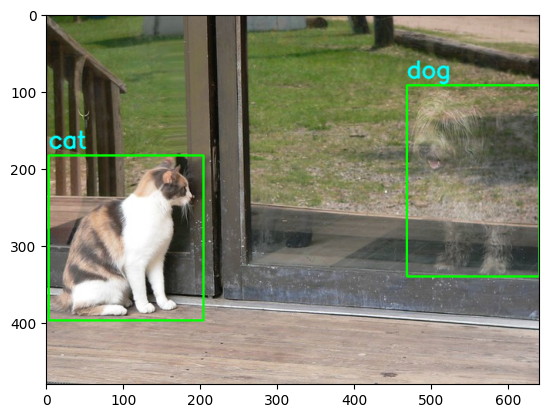

In [7]:
def xml_read(xml_path):
    root=parse(xml_path).getroot()
    
    image_info=root.findall('image')
    print(image_info)
    
    for image in image_info:
        # image 에서 box 이름과 매칭 되는 전부를 list에 넣어서 반환
        bbox=image.findall('box')
        
        # width,height 이름이 매칭되는 값
        image_width=image.attrib['width']
        image_height=image.attrib['height']
        print('이미지 크기 정보 >> ', image_width,image_height)
        
        # image name
        image_name=image.attrib['name']
        print('이미지 이름 : ', image_name)
        image_path=os.path.join('/Users/iamseungman/MS/ImageProcessing/0614/',image_name)
        print('이미지 경로 >> ', image_path)
        
        image=cv2.imread(image_name)
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    
        for box_info in bbox:
            label=box_info.attrib['label']

        ### xml의 값들은 string으로 되어있기 때문에 string->float->int 과정을 거쳐야함
            # 값->string 타입
            xtl=box_info.attrib['xtl'] #Top-Left X(좌상단 X 좌표)
            ytl=box_info.attrib['ytl'] #Top-Left y(좌상단 y 좌표)
            xbr=box_info.attrib['xbr'] #Bottom-right X(우하단 X 좌표)
            ybr=box_info.attrib['ybr'] #Bottom-right y(좌상단 y 좌표)

            # 소수점이 포함이라 바로 int 값 변환 불가 하여 float 변환
            # float->int 변환
            xtl_i=int(float(xtl))
            ytl_i=int(float(ytl))
            xbr_i=int(float(xbr))
            ybr_i=int(float(ybr))

            # 그리기
            image=cv2.rectangle(image,(xtl_i,ytl_i),(xbr_i,ybr_i),(0,255,0),2)
            
            # 라벨추가
            image=cv2.putText(image,label,(xtl_i,ytl_i-10),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,255),2,
                             cv2.LINE_AA)
       
    plt.imshow(image)
    plt.show()
        
xml_read('./annotations.xml')